In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv("mifiltro.csv")

In [ ]:
data["Authors"]

0    Pozo Hernández F.M.; Aldaz Bombón O.R.; Cabeza...
1              Ramírez-Álvarez J.; Oliva N.; Andino M.
2    Solarte-Astaíza Z.M.; Caicedo-Rendón Ó.M.; Imb...
3                            Pinto A.R.F.; Nagano M.S.
4                                  Hernandez-Ortega B.
5    Fernández P.S.; Rodríguez E.G.; Fernández D.R....
6                                                  NaN
7                Hernández-Ortega B.; Serrano-Cinca C.
Name: Authors, dtype: object

In [ ]:
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

In [ ]:
data.keys()

Index(['Authors', 'Author full names', 'Author(s) ID', 'Titles', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'DOI', 'Cited by', 'Link', 'Abstract', 'Indexed Keywords',
       'Author Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [ ]:
titulos = str
for titulo in data["Author Keywords"]:
    titulos = str(titulo) + " " + str(titulos)
titulos

"Competitive environment; E-invoicing; Early adopters; Key motivations; Perceptions nan Export intensity; Foreign trade; Internationalization Adopters; E-invoicing; Perceived compatibility; Perceived security distribution center; genetic algorithm; iterative greedy algorithm; maximized billing Payment - safety measures; Payment-technological innovations; Ubiquitous Computing Invoicing; Tax compliance; Tax evasion; value-Added tax (VAT) Document control; Electronic invoicing; Sanction prevention; Tax regulations <class 'str'>"

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


In [ ]:
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)

In [ ]:
lista_texto = clean_texto.split(" ")

palabras = []

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

In [ ]:
word_count={}
for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
 

In [ ]:
df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
tax,4
perceived,2
einvoicing,2
adopters,2
algorithm,2
invoicing,2
competitive,1
measures,1
innovations,1
ubiquitous,1


In [ ]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

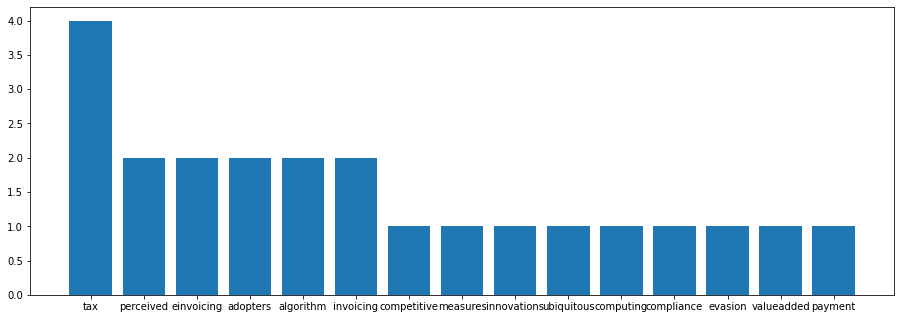

In [ ]:
plot_bar(data=df, top=15)

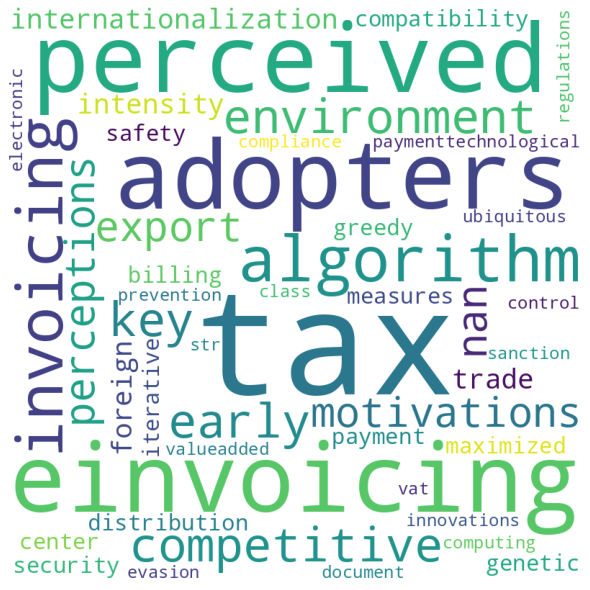

In [ ]:
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

word_cloud.to_file("n1.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
data.head()

,Authors,Author full names,Author(s) ID,Titles,Year,Source title,Volume,Issue,Art. No.,Page start,...,Cited by,Link,Abstract,Indexed Keywords,Author Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,Pozo Hernández F.M.; Aldaz Bombón O.R.; Cabeza...,"Pozo Hernández, Fanny Maricela (57280625100); ...",57280625100; 57211483570; 57280493900; 5722198...,Analysis of electronic invoicing as a mechanis...,2021,Universidad y Sociedad,13.0,S3,NaN,437.0,...,1,https://www.scopus.com/inward/record.uri?eid=2...,Microenterprises are units for the production ...,NaN,Document control; Electronic invoicing; Sancti...,Article,Final,NaN,Scopus,2-s2.0-85121232889
1,Ramírez-Álvarez J.; Oliva N.; Andino M.,"Ramírez-Álvarez, José (57219162267); Oliva, Ni...",57219162267; 57432838300; 57433124700,Tax compliance and electronic invoicing in Ecu...,2022,Problemas del Desarrollo,53.0,208,NaN,97.0,...,0,https://www.scopus.com/inward/record.uri?eid=2...,"In 2013, the Ecuadorian Tax Administration off...",NaN,Invoicing; Tax compliance; Tax evasion; value-...,Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-85123798831
2,Solarte-Astaíza Z.M.; Caicedo-Rendón Ó.M.; Imb...,"Solarte-Astaíza, Zeida María (36807255700); Ca...",36807255700; 57214098924; 36806078900; 3680563...,Billing and payment platform in ubiquitous env...,2009,Ingenieria y Universidad,13.0,1,NaN,157.0,...,0,https://www.scopus.com/inward/record.uri?eid=2...,Computing has gone through two stages: the cen...,Civil defense; Electronic commerce; Mobile dev...,Payment - safety measures; Payment-technologic...,Article,Final,NaN,Scopus,2-s2.0-78651569627
3,Pinto A.R.F.; Nagano M.S.,"Pinto, Anderson Rogério Faia (56701730300); Na...",56701730300; 23061561000,An Efficient Algorithm Applied to Optimized Bi...,2022,Ingenieria e Investigacion,42.0,2,e83394,NaN,...,0,https://www.scopus.com/inward/record.uri?eid=2...,This paper addresses the Optimized Billing Seq...,NaN,distribution center; genetic algorithm; iterat...,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85129950842
4,Hernandez-Ortega B.,"Hernandez-Ortega, Blanca (24398753900)",24398753900,Key factors for the adoption and subsequent us...,2012,Academia Revista Latinoamericana de Administra...,NaN,50,NaN,15.0,...,14,https://www.scopus.com/inward/record.uri?eid=2...,E-invoicing is considered to be one of the mos...,NaN,Adopters; E-invoicing; Perceived compatibility...,Article,Final,NaN,Scopus,2-s2.0-84874093577
